# Final project

Assignment Instructions
The course project allows you to utilize the skills that you have learned in the course to develop and present an analysis of a large data set. You will be required to include specific analyses in your report and present the results to your colleagues. There will be a focus on using technology throughout the project.

## Tasks

Specific details of the course project:

- [x] Find a set of data that includes somewhere between 100 and 50,000 data points, with at least two quantitative variables and at least one categorical variable. 
- [ ] From this data you are going to perform a series of statistical computations and present the findings to your peers by means of a technology presentation tool. The presentation will be recorded, and you will orally present your findings to the class. Your presentation will be uploaded to the forum so that your peers can review it. 
- [ ] In addition, you will include a formal write-up of the findings that will be submitted in the class assignments folder. You will have the opportunity to be creative in how you present the findings from your data set, and we will be discussing online tools and tips/strategies for presenting data throughout the class. 

### Presentation

In your presentation, you will be required to show the following:

- [x] Describe the nature of the data. What do the data represent?
- [x] Why did you choose this data set?
- [x] How many data points are included?
- [ ] Describe the types of variables, the type of sample, possible lurking variables, and any possible association or causation.
- [x] Create a histogram of your quantitative variable(s), describe the shape of the distribution, and find the mean and median.
- [ ] Compute the standard deviation, the five number summary, and the range and interquartile range. Provide a visual representation of this information.
- [ ] Find possible outliers (there may be none, but you will need to show how you determined that), draw a boxplot, create a scatterplot, and compute the sample correlation r.
- [ ] If you found a moderate to strong linear relation between variables, compute the regression equation and describe how you could use a regression line to make predictions.
- [ ] Conclude with a summary of the major findings. How have these findings informed the topic, and what are the implications of the findings?

*In the presentation you do not need to show each step of the computations for every statistic. You will, however, be required to show the work in the write-up.*

### Write up

In addition to presenting the findings from your data set, you will submit a formal write-up of the results. This will be submitted to the Assignments Folder in the classroom. The write-up should include detailed calculations for each statistic. It should also include all of the summary charts/tables that were presented. The write-up consists of 10% of the final course grade. 

The write-up should follow a standard narrative format, including a title page, introduction, body, conclusion, and references where appropriate. You will use APA formatting as you write. Keep in mind that in statistics we are often tasked with presenting complex analyses in a straightforward and simplified manner. We know that visual representations of data are vital to this effort. In addition, we are often required to present our findings in written form. Here you will want to explain the findings in detail, focusing on the big picture of what the findings mean and why they are important.


# Solar system small body analysis

The data presented here is a sample collected from NASA's JPL Small-Body Database.
They represent smaller objects in the Solar System such as comets, asteriods, and moons.
I chose this data set because I am curious about space science, and this is an opportunity to learn more about the subject while fulfilling the requirements of the assignment.
Please forgive any inaccurate statements about orbital mechanics!
There are **22,458 cases** in my sample.

### Variables

|Title|Description|Type|
|---|---|---|
|full_name|Full Name|string|
|a| [au] semi-major axis|float64|
|e| eccentricity|float64|
|i| [deg] inclination|float64|
|w| [deg] perihelion degree|float64|
|om| [deg] node degree (longitude of the ascending node)|float64|
|ma| [deg] M mean anomaly degree|float64|
|q| [au] perihelion distance|float64|
|ad| [au] Q aphelion distance|float64|
|per_y| period years|float64|
|H| absolute magnitude|float64|
|moid| [au] Earth MOID (minimum orbit intersection distance)|float64|
|orbit_id|Orbit solution ID|string|
|class|Orbit class|string|

All of the `float64` data types are **quantitative** variables, and the `string` data types `orbit_id` and `class` are **categorical**.

### Oribit Classes

Below is a table of orbit classes.  There is a wealth of information on the [CNEOS website](https://cneos.jpl.nasa.gov/) that provides much more detail than I can here.

|class|name|num|
|---|:---|---|
|AMO|Amor|8267|
|APO|Apollo|12308|
|ATE|Aten|1684|
|ETc|Encke-type Comet|1|
|HTC|Halley-type Comet|30|
|IEO|Atira|21|
|JFC|Jupiter-family Comet*|10|
|JFc|Jupiter-family Comet|137|

JFC -> Jupiter-family comet, classical definition (P < 20 y).  
JFc -> Jupiter-family comet, as defined by Levison and Duncan (2 < TJupiter < 3).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display

df = pd.read_csv("neo.csv")
print(f"Length of sample: {len(df)}")
df.head()

Length of sample: 22458


,full_name,a,e,i,w,om,ma,q,ad,per_y,H,moid,orbit_id,class
0,433 Eros (1898 DQ),1.458046,0.222951,10.830543,178.882294,304.299327,271.071732,1.132973,1.783119,1.760617,10.4,0.148623,656,AMO
1,719 Albert (1911 MT),2.638602,0.546558,11.567485,156.176338,183.866950,140.273422,1.196452,4.080752,4.286167,15.4,0.203482,JPL 214,AMO
2,887 Alinda (1918 DB),2.473737,0.570332,9.393854,350.495585,110.434218,294.579157,1.062886,3.884588,3.890796,13.8,0.082217,223,AMO
3,1036 Ganymed (1924 TD),2.664725,0.533046,26.677643,132.364631,215.546826,4.817745,1.244303,4.085146,4.349974,9.4,0.344956,783,AMO
4,1221 Amor (1932 EA1),1.919498,0.435285,11.876536,26.694797,171.326998,38.522409,1.083970,2.755027,2.659437,17.7,0.107451,83,AMO


In [3]:
print(df.groupby("class").size())
print(df.groupby("orbit_id").size())

class
AMO     8267
APO    12308
ATE     1684
ETc        1
HTC       30
IEO       21
JFC       10
JFc      137
dtype: int64
orbit_id
1             252
10            618
100            10
101            11
102             5
             ... 
JPL K204/4      1
MPO508629       1
SAO/1938        1
SAO/1939        1
SAO_2008        9
Length: 547, dtype: int64


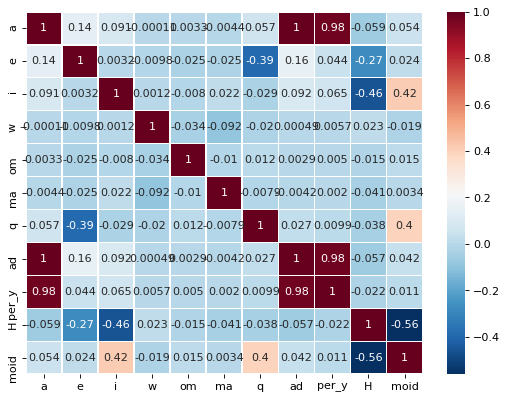

In [4]:
import seaborn as sb
from matplotlib.pyplot import figure


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

pearsoncorr = df.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

In [5]:
# %matplotlib
# pd.plotting.scatter_matrix(df)
# plt.show()

![scatter matrix](scatter.png "Scatter Matrix")

In [6]:
df.dtypes

full_name     object
a            float64
e            float64
i            float64
w            float64
om           float64
ma           float64
q            float64
ad           float64
per_y        float64
H            float64
moid         float64
orbit_id      object
class         object
dtype: object

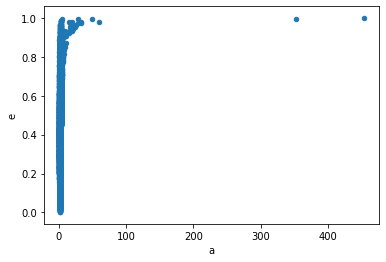

In [14]:
df.plot.scatter(x="a", y="e")

Mean: 0.447
Median: 0.460


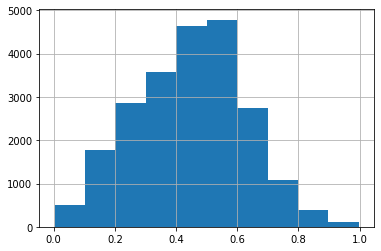

In [15]:
_ = df["e"].hist()
print(f"Mean: {round(df['e'].mean(), 3):#.3g}")
print(f"Median: {round(df['e'].median(), 3):#.3g}")

Mean: 1.837
Median: 1.723


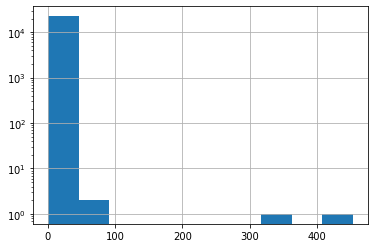

In [16]:
_ = df["a"].hist(log=True)
print(f"Mean: {round(df['a'].mean(), 3)}")
print(f"Median: {round(df['a'].median(), 3)}")

In [7]:
from matplotlib.pyplot import figure

n = len(df)
a = ( sum(df["Time"])*sum(df["No."]**2)-sum(df["No."])*sum(df["No."]*df["Time"]) ) / \
    (n * sum(df["No."]**2) - sum(df["No."])**2)
b = ( n *sum(df["No."]*df["Time"]) - sum(df["No."])*sum(df["Time"]) ) / \
    (n * sum(df["No."]**2) - sum(df["No."])**2)

x = np.array(range(40))
_ = df.plot.scatter(x="No.", y="Time")
_ = plt.plot(x, a + b * x)


KeyError: 'Time'

## Resources

- https://ssd.jpl.nasa.gov/sbdb_query.cgi 
- https://earthobservatory.nasa.gov/features/OrbitsCatalog
- https://www.airuniversity.af.edu/Portals/10/AUPress/Books/AU-18.PDF
- https://cneos.jpl.nasa.gov/about/neo_groups.html
- https://cneos.jpl.nasa.gov/glossary/